# H2 details

From the previous notebook, we drew the following preliminary conclusions:
 - For the main cloud of points, there is some indication of grain growth from NH/AV vs 1/RV
    and fh2 vs 1/RV. NH/AV does not change too strongly, but clearly fh2 is affected as
    expected.
  - For the 4 outliers, there is a strong change in NH/AV, coupled with a strong change in RV,
    consistent with the above relationship. The processes or environment associated with this
    relative grain mass increase might have affected fh2, as it is very different between those
    4 stars, despite being on the aforementioned trend.
  - Gas to dust ratio does not influence fh2 for both sets of points
  
In this notebook we will look at some H2-specific data

In [66]:
%load_ext autoreload
%autoreload 2

import get_data
from matplotlib import pyplot as plt
from astropy.table import Column
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data = get_data.get_merged_table()

# add comments for certain stars here
data.add_column(Column(['no'] * len(data), dtype='<U16', name='comment'))
def set_comment(name, s):
    data['comment'][data['Name'] == name] = s

for name in ["HD200775", "HD164906", "HD045314", "HD206773"]:
    set_comment(name, "lo_h_av")

set_comment("HD096675", "hi_h_av")

data

Name,lognhtot,lognhtot_unc,lognhi,lognhi_unc,lognh2,lognh2_unc,logfh2,lognh,hiref,nhi,nhi_unc,nh2,nh2_unc,nhtot,nhtot_unc,fh2,fh2_unc,nh,SpType,Comparison,V,AV,AV_runc,AV_sunc,EBV,EBV_runc,EBV_sunc,RV,RV_runc,RV_sunc,AV_unc,EBV_unc,RV_unc,CAV1,CAV1_runc,CAV1_sunc,CAV2,CAV2_runc,CAV2_sunc,CAV3,CAV3_runc,CAV3_sunc,CAV4,CAV4_runc,CAV4_sunc,x_o,x_o_runc,x_o_sunc,gamma,gamma_runc,gamma_sunc,CAV1_unc,CAV2_unc,CAV3_unc,CAV4_unc,x_o_unc,gamma_unc,C1,C1_unc,C2,C2_unc,C3,C3_unc,C4,C4_unc,NH_AV,NH_AV_unc,NH_EBV,NH_EBV_unc,bump_area,bump_area_unc,comment
str10,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str16
BD+35d4258,21.25738178715031,0.048423172954873195,21.24,0.05,19.55,0.07,-1.406351791486331,-0.76,15,1.7378008287493693e+21,2.005139904227841e+20,3.5481338923357606e+19,5.743710571506721e+18,1.8087635065960844e+21,2.0084277731545468e+20,0.039232701007032154,0.007701475402127867,0.17378008287493754,B0.5V,HD097471,9.41,0.95,0.04,0.03,0.31,0.053,0.037,3.06,0.38,0.011,0.05,0.06463745044476925,0.38015917718766173,0.6,0.119,0.032,0.38,0.022,0.018,1.84,0.276,0.078,0.04,0.012,0.003,4.73,0.08,0.012,1.34,0.033,0.024,0.123227432010896,0.02842534080710379,0.2868100416652109,0.012369316876852983,0.08089499366462674,0.040804411526206334,-1.2240000000000002,-0.3582288598960656,1.1628,0.2575834659025062,5.630400000000001,1.4657713329578816,0.12240000000000001,0.04565053121951978,1.9039615858906154e+21,2.3396023409334275e+20,5.834720989019627e+21,1.3783426827663216e+21,2.156914359181052,0.3425645129218912,no
BD+53d2820,21.394307013116407,0.048508337038422056,21.35,0.05,20.08,0.17,-1.0132770174524268,-0.64,15,2.238721138568347e+21,2.583120582703549e+20,1.2022644346174082e+20,4.82724446937415e+19,2.4791740254918284e+21,2.7576445585809015e+20,0.09698911187800931,0.040409102286178014,0.2290867652767773,B0IV,HD104705,9.95,1.2,0.04,0.03,0.4,0.047,0.035,3.01,0.249,0.012,0.05,0.05860034129593445,0.24928898892650675,0.7,0.06,0.026,0.3,0.012,0.012,1.06,0.089,0.042,0.1,0.008,0.004,4.62,0.033,0.012,1.01,0.023,0.015,0.06539113089708726,0.01697056274847714,0.09841239759298621,0.008944271909999158,0.03511409973215888,0.02745906043549196,-0.903,-0.15689616713769652,0.9029999999999999,0.14180981793409086,3.1906,0.5533839362743554,0.301,0.051665578120253325,2.0659783545765238e+21,2.4539749715548717e+20,6.197935063729571e+21,1.1400687519478279e+21,1.6485585211906837,0.15948266874647712,no
BD+56d524,21.570568601612063,0.1563332035447722,21.38,0.16,20.82,0.28,-0.4495386059480802,-0.32,0,2.398832919019485e+21,9.038907985438767e+20,6.606934480075964e+20,4.560942806708201e+20,3.7202198150346776e+21,1.284175434718644e+21,0.35519054295528923,0.2741430576487368,0.4786300923226383,B1V,BD+52d3210,9.75,1.8,0.04,0.02,0.6,0.044,0.023,2.98,0.191,0.009,0.044721359549995794,0.04964876634922563,0.1912119243143586,0.67,0.046,0.018,0.32,0.008,0.008,1.4,0.078,0.036,0.13,0.009,0.003,4.58,0.021,0.008,1.03,0.019,0.009,0.04939635614091387,0.01131370849898476,0.08590692637965812,0.009486832980505138,0.022472205054244233,0.02102379604162864,-0.9833999999999998,-0.1089877479186896,0.9536,0.08580928268873686,4.172,0.42978745160317966,0.3874,0.04274176669904457,2.0667887861303765e+21,7.152763816400112e+20,6.200366358391129e+21,2.2009293148174743e+21,2.1350629684590827,0.13806997620211023,no
HD001383,21.53591122078555,0.03984725816956036,21.46,0.04,20.44,0.13,-0.7948812251215694,-0.45,15,2.8840315031266116e+21,2.6600483413649365e+20,2.7542287033381745e+20,8.36807173151094e+19,3.43487724379424

In [31]:
# note: T01 is related to ortho to para ratio, not just excitation
from astropy.table import Table
import pandas as pd
# data = Table.read('data/fuse_h2_details.dat', format="ascii.commented_header")
t = pd.read_csv('data/fuse_h2_details.dat', delim_whitespace=True)
t
type(t['name'])
t2 = Table.from_pandas(t)
t2

name,lognj0,lognj0_unc,lognj1,lognj1_unc,lognj2,lognj2_unc,lognj3,lognj3_unc,lognj4,lognj4_unc,lognj5,lognj5_unc,lognj6,lognj6_unc,lognj7,lognj7_unc
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BD+35d4258,19.1,0.1,19.35,0.1,17.45,0.35,17.25,0.4,15.5,0.1,15.2,0.06,--,--,--,--
BD+53d2820,19.55,0.25,19.8,0.25,17.45,0.5,17.05,0.5,15.25,0.25,14.65,0.15,--,--,--,--
idem,19.0,0.5,19.0,0.5,15.4,0.25,15.4,0.25,14.6,0.25,14.3,0.25,--,--,--,--
BD+56d524,19.65,0.4,20.4,0.4,18.55,0.25,16.45,0.25,15.65,0.25,15.0,0.25,--,--,--,--
idem,20.45,0.4,19.85,0.4,18.75,0.25,16.65,0.25,14.85,0.25,14.65,0.25,--,--,--,--
HD001383,19.8,0.25,19.85,0.25,17.2,0.25,16.55,0.25,15.1,0.25,14.75,0.25,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD116852,19.54,0.1,19.45,0.1,17.61,0.05,17.37,0.06,14.97,0.05,14.11,0.05,--,--,--,--
HD172140,19.0,0.15,18.8,0.2,16.23,0.1,15.82,0.1,14.44,0.1,14.01,0.1,--,--,--,--


In [52]:
h2data = get_data.get_fuse_h2_details(stars=data['Name'])

/Users/dvandeputte/Projects/FUSE H2/plotting_git/get_data.py:12: RuntimeWarning: overflow encountered in power
  lin = np.power(10.0, log)
/Users/dvandeputte/Projects/FUSE H2/plotting_git/get_data.py:13: RuntimeWarning: overflow encountered in power
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))
/Users/dvandeputte/Projects/FUSE H2/plotting_git/get_data.py:13: RuntimeWarning: invalid value encountered in subtract
  lin_unc = 0.5 * (np.power(10.0, log + log_unc) - np.power(10.0, log - log_unc))


In [53]:
h2data

name,nj0,nj0_unc,nj1,nj1_unc,nj2,nj2_unc,nj3,nj3_unc,nj4,nj4_unc,nj5,nj5_unc,nj6,nj6_unc,nj7,nj7_unc
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BD+35d4258,1.2589254117941713e+19,2.924465962305619e+18,2.238721138568347e+19,5.200517606127747e+18,2.8183829312644493e+17,2.5253240165038912e+17,1.778279410038923e+17,1.8794450685627382e+17,3162277660168379.5,734592637012693.8,1584893192461111.0,219658297003550.75,0.0,0.0,0.0,0.0
BD+53d2820,4.54813389233576e+19,2.5842445958636257e+19,7.309573444801943e+19,4.091465543868699e+19,2.843501795579545e+17,4.0106582965432275e+17,1.1471373186170611e+17,1.5967332830963264e+17,2176386580592419.8,1107900266062001.9,646209823647851.8,198692645023904.38,0.0,0.0,0.0,0.0
BD+56d524,3.265066523415411e+20,3.015898697131478e+20,3.219832215893712e+20,2.758210750746382e+20,9.171547144239251e+18,4.0425155324882125e+18,7.285218852774066e+16,3.21108422676684e+16,5174781705893772.0,2749594044486222.0,1446683592150963.5,665865234510643.0,0.0,0.0,0.0,0.0
HD001383,1.1290645150336929e+20,4.576341291430912e+19,1.6397636826251153e+20,6.237220721905389e+19,2.743382511707222e+17,1.1434029825834176e+17,6.851665306966414e+16,2.8908404854145376e+16,2597283647060760.5,1083498397383515.1,1000259212799195.8,419587612915669.3,0.0,0.0,0.0,0.0
HD013268,9.54992586021437e+19,2.2184342979411804e+19,1.6595869074375564e+20,3.855196961488207e+19,1.0471285480508986e+17,1.4900900466716586e+17,3.715352290971728e+16,3.926717309900837e+16,4677351412871981.0,1086542131292078.0,1548816618912479.5,286918792484866.6,0.0,0.0,0.0,0.0
HD014250,1.7673509338563258e+20,9.9620978499732e+19,2.763075074660529e+20,1.5347659398752217e+20,5.021872336272715e+18,1.76571931875348e+18,1.1320184543019653e+18,6.82179577355325e+17,8201476298143338.0,2525193583769513.0,1295515468351553.5,330885545678333.44,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD206773,1e+20,3.522958801193047e+19,1.5848931924611108e+20,3.6816845158736093e+19,1.5848931924611108e+18,2.9360198970341325e+17,2.511886431509572e+17,1.0711535278840203e+17,2511886431509582.0,348134939588529.9,562341325190349.06,64885055426461.41,0.0,0.0,0.0,0.0
HD207198,3.9810717055349857e+20,9.247973380521882e+19,2.818382931264449e+20,6.547063768837158e+19,2.511886431509572e+18,5.835076725997564e+17,1e+17,3.5229588011930468e+16,5011872336272715.0,1164250869633473.8,794328234724282.1,91652576874805.19,0.0,0.0,0.0,0.0


In [54]:
h2data.columns

<TableColumns names=('name','nj0','nj0_unc','nj1','nj1_unc','nj2','nj2_unc','nj3','nj3_unc','nj4','nj4_unc','nj5','nj5_unc','nj6','nj6_unc','nj7','nj7_unc')>

In [81]:
def gi(J):
    grot = 2*J + 1
    if J % 2 == 0:
        return grot
    else:
        return 3 * grot
    
dE01 = 170.48
dE35 = 1

gi(1)

9

In [82]:

t01 = dE01 / np.log(gi(1)/gi(0) * h2data['nj0'] / h2data['nj1'])
t35 = dE35 / np.log(gi(5)/gi(3) * h2data['nj3'] / h2data['nj5'])

/var/folders/ls/5hq1qd290zb7dmjtzf31p6dr000122/T/ipykernel_22955/445515245.py:2: RuntimeWarning: divide by zero encountered in true_divide
  t35 = dE35 / np.log(gi(5)/gi(3) * h2data['nj3'] / h2data['nj5'])


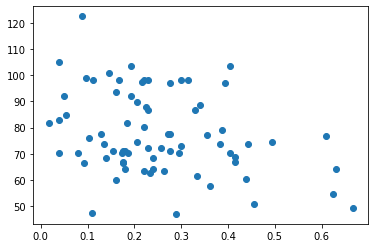

In [70]:
plt.scatter(data['fh2'], t01)

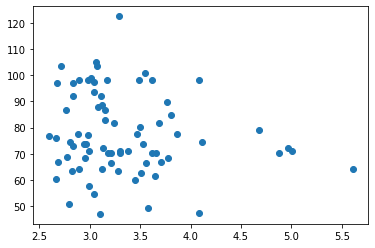

In [71]:
plt.scatter(data['RV'], t01)

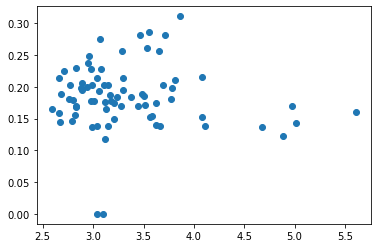

In [83]:
plt.scatter(data['RV'], t35)

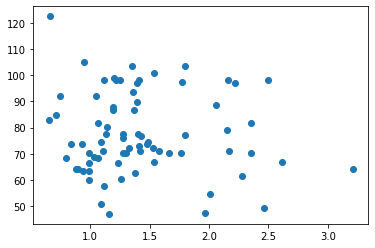

In [74]:
plt.scatter(data['AV'], t01)

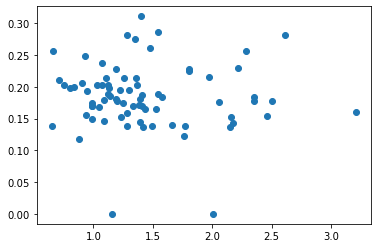

In [84]:
plt.scatter(data['AV'], t35)

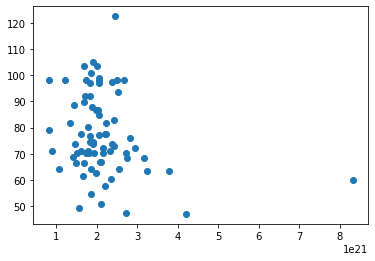

In [75]:
plt.scatter(data['NH_AV'], t01)

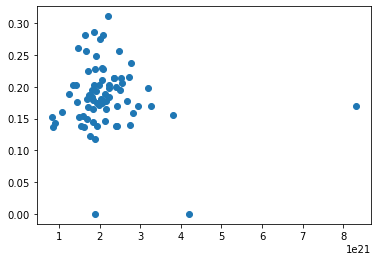

In [85]:
plt.scatter(data['NH_AV'], t35)